In [2]:
using HDF5, Plots
import LinearAlgebra: norm

In [1]:
function getparameters(folder) 
    files = filter(x->endswith(x, ".h5"), readdir(folder))   
    
    fid     = h5open(joinpath(folder,files[110]), "r")
    zref    = read(fid, "River/z")
    zref  .-= zref[1]

    U       = Array{Float64}(undef,length(files))
    βz      = similar(U)
    rms     = similar(U)
    @inbounds for i ∈ 1:length(files)
        fid     = h5open(joinpath(folder,files[i]), "r")
        U[i]    = read(fid, "Parameters/U")
        βz[i]   = read(fid, "Parameters/beta_z")

        z       = read(fid, "River/z")
        z     .-= z[1]
        rms[i]  = norm(zref.-z)
    end

    return U,βz,rms
end

getparameters (generic function with 1 method)

In [6]:
U,βz,rms = getparameters("/Users/albert/Documents/JuliaLandscape/output");

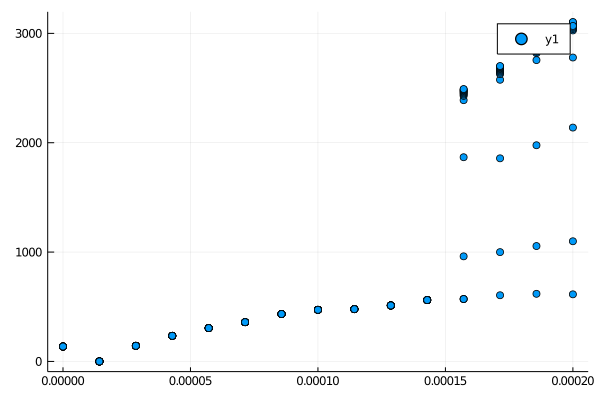

In [7]:
scatter(U,rms)

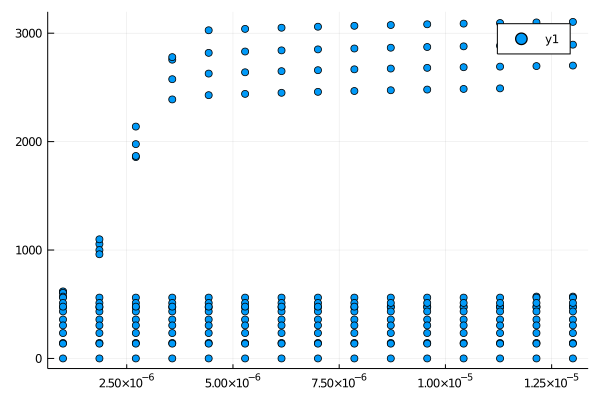

In [8]:
scatter(βz,rms)

In [ ]:
R = rms' .* ones(length(U))
heatmap(U,βz,R)